In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
df = pd.read_csv(r"used_cars.csv")
display(df.columns)

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [3]:
display(df.sample(frac=1).head())
display(df.shape)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
760,Ford,Bronco Wildtrak Advanced,2022,"15,600 mi.",Gasoline,315.0HP 2.7L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,–,At least 1 accident or damage reported,Yes,"$68,995"
1290,Hyundai,Sonata Hybrid Base,2012,"154,000 mi.",Hybrid,206.0HP 2.4L 4 Cylinder Engine Gas/Electric Hy...,A/T,Green,Gray,At least 1 accident or damage reported,Yes,"$8,500"
2243,Toyota,Sienna XLE Limited,2007,"112,630 mi.",Gasoline,266.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Silver,Gray,At least 1 accident or damage reported,Yes,"$11,500"
2356,Ford,F-150 XLT,2017,"94,000 mi.",Gasoline,325.0HP 2.7L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,None reported,Yes,"$26,000"
2842,Ford,F-250 XLT,2017,"29,719 mi.",E85 Flex Fuel,385.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,"$31,000"


(4009, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
display(df.describe())

df['milage'] = df['milage'].str.replace('. mi', '').str.replace(',', '')

# Convert the cleaned strings to numeric values
df['milage'] = pd.to_numeric(df['milage'])
print(df.dtypes)

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


brand            object
model            object
model_year        int64
milage          float64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title      object
price            object
dtype: object


C:\Users\Ishita Bhojani\AppData\Local\Temp\ipykernel_18744\34577415.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['milage'] = df['milage'].str.replace('. mi', '').str.replace(',', '')


In [6]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '')

# Convert the cleaned strings to numeric values
df['price'] = pd.to_numeric(df['price'])
print(df.dtypes)

brand            object
model            object
model_year        int64
milage          float64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title      object
price             int64
dtype: object


C:\Users\Ishita Bhojani\AppData\Local\Temp\ipykernel_18744\1680108873.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '')


<Axes: >

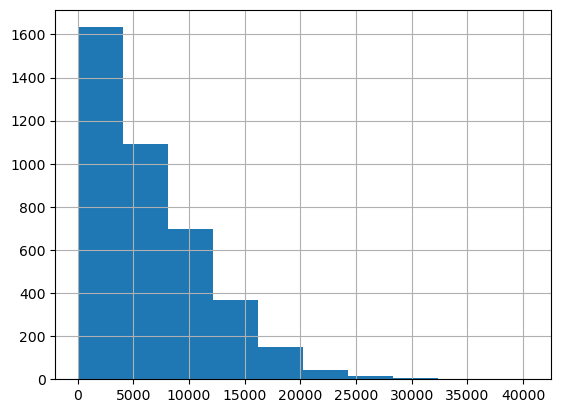

In [7]:
df.head()
df["milage"].hist()

In [18]:
df[df["milage"]<=50000].describe()

,model_year,milage
count,1931.000000,1931.000000
mean,2018.893837,22990.967374
std,4.554406,14503.802766
min,1974.000000,100.000000
25%,2018.000000,10470.500000
50%,2020.000000,22000.000000
75%,2022.000000,35400.000000
max,2024.000000,50000.000000


In [19]:
df[df["milage"] == 0].shape

(0, 12)

In [20]:
df = df.drop(df[df["milage"]==0].index, axis =0)

In [21]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,2116.0,NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [23]:
df[df["milage"] > 40000]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
...,...,...,...,...,...,...,...,...,...,...,...,...
3997,Chevrolet,Impala 2LZ,2018,71312.0,Gasoline,305.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$17,899"
3998,Porsche,911 Carrera,2015,43500.0,Gasoline,350.0HP 3.4L Flat 6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,"$66,500"
4001,Volkswagen,Routan SE,2011,194000.0,Gasoline,283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Gray,At least 1 accident or damage reported,Yes,"$3,500"
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705.0,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,"$25,900"


C:\Users\Ishita Bhojani\AppData\Local\Temp\ipykernel_3008\392366684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(sns.heatmap(df.corr(),cmap = "YlGnBu",annot = True))


<Axes: >

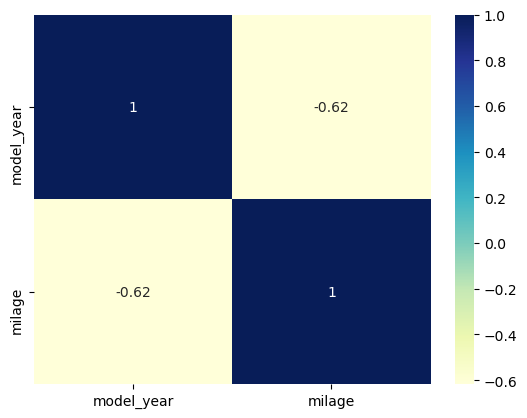

In [24]:
display(sns.heatmap(df.corr(),cmap = "YlGnBu",annot = True))

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = df[df.columns.drop('price')]
Y = df['price']

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
cols = X.columns
X[cols] = sc.fit_transform(X[cols])


ValueError: could not convert string to float: 'Ford'

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X,Y)

ValueError: could not convert string to float: 'Ford'

In [13]:
model.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [14]:
moed.coef_

NameError: name 'moed' is not defined

In [15]:
model.score()

TypeError: RegressorMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [16]:
print('Adjusted R-Square: ', 1-(model.score(X,Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

ValueError: could not convert string to float: 'Ford'

In [17]:
import statsmodels.api as sm

In [18]:
X_sm = sm.add_constant(X)

sm_model = sm.OLS(Y,X_sm).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const           float64
brand            object
model            object
model_year        int64
milage          float64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title      object
dtype: object. The data was
0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64
and
       const     brand                            model  model_year  milage  \
0       1.0      Ford  Utility Police Interceptor Base        2013  5100.0   
1       1.0   Hyundai                     Palisade SEL        2021  3474.0   
2       1.0     Lexus                    RX 350 RX 350        2022  2237.0   
3       1.0  INFINITI                 Q50 Hybrid Sport        2015  8890.0   
4       1.0      Audi        Q3 45 S line Premium Plus        2021   983.0   
...     ...       ...                              ...         ...     ...   
4004    1.0   Bentley             Continental GT Speed        2023    71.0   
4005    1.0      Audi             S4 3.0T Premium Plus        2022  1090.0   
4006    1.0   Porsche                           Taycan        2022   211.0   
4007    1.0      Ford                     F-150 Raptor        2020  3300.0   
4008    1.0       BMW                     X3 xDrive30i        2020  4300.0   

          fuel_type                                             engine  \
0     E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1          Gasoline                               3.8L V6 24V GDI DOHC   
2          Gasoline                                     3.5 Liter DOHC   
3            Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4          Gasoline                         2.0L I4 16V GDI DOHC Turbo   
...             ...                                                ...   
4004       Gasoline                   6.0L W12 48V PDI DOHC Twin Turbo   
4005       Gasoline      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4006            NaN                                           Electric   
4007       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008       Gasoline       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                           transmission                 ext_col  int_col  \
0                           6-Speed A/T                   Black    Black   
1                     8-Speed Automatic         Moonlight Cloud     Gray   
2                             Automatic                    Blue    Black   
3                           7-Speed A/T                   Black    Black   
4                     8-Speed Automatic  Glacier White Metallic    Black   
...                                 ...                     ...      ...   
4004  8-Speed Automatic with Auto-Shift                   C / C  Hotspur   
4005     Transmission w/Dual Shift Mode                   Black    Black   
4006                          Automatic                   Black    Black   
4007                                A/T                    Blue    Black   
4008                                A/T                    Gray    Brown   

                                    accident clean_title  
0     At least 1 accident or damage reported         Yes  
1     At least 1 accident or damage reported         Yes  
2                              None reported         NaN  
3                              None reported         Yes  
4                              None reported         NaN  
...                                      ...         ...  
4004                           None reported         Yes  
4005                           None reported         Yes  
4006                           None reported         NaN  
4007                           None reported         Yes  
4008  At least 1 accident or damage reported         Yes  

[4009 rows x 12 columns]
before. After,
[10300 38005 54598 ... 90998 62999 40000]
[[1.0 'Ford' 'Utility Police Interceptor Base' ... 'Black'
  'At least 1 accident or damage reported' 'Yes']
 [1.0 'Hyundai' 'Palisade SEL' ... 'Gray'
  'At least 1 accident or damage reported' 'Yes']
 [1.0 'Lexus' 'RX 350 RX 350' ... 'Black' 'None reported' nan]
 ...
 [1.0 'Porsche' 'Taycan' ... 'Black' 'None reported' nan]
 [1.0 'Ford' 'F-150 Raptor' ... 'Black' 'None reported' 'Yes']
 [1.0 'BMW' 'X3 xDrive30i' ... 'Brown'
  'At least 1 accident or damage reported' 'Yes']].

In [19]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif = pd.DataFrame()
X_t = X
vif['features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values,i) for i in range[X_t.shape[1]]]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', acsending = False)
vif

TypeError: 'type' object is not subscriptable

In [22]:
col2 = [...]

In [23]:
X2 = X[col2]

X2_sm = sm.add_constant(X2)

sm_model = sm.OLS(Y, X2_sm).fit()

KeyError: "None of [Index([Ellipsis], dtype='object')] are in the [columns]"

In [1]:
print(sm_model.summery())

NameError: name 'sm_model' is not defined

In [2]:
y_pred = final_model.predict(x_test)

NameError: name 'final_model' is not defined

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [4]:
print(MAE)
print(MSE)
print(RMSE)

NameError: name 'MAE' is not defined

In [5]:
# Residual Analysis
# Errors normally distribution
pred = final_model.predict(x_train)


NameError: name 'final_model' is not defined

In [6]:
errors = pred - y_train  # residuals

NameError: name 'pred' is not defined

In [7]:
sns.scatterplot(pred, errors)


NameError: name 'sns' is not defined

In [8]:
# remove the outlier which are greater than normal price then  removed it
# for non constant variance


In [10]:
#again retrain the model  using features and check the shape
# split data in train and test data

In [11]:
 # autojcrelation : check the book  